Starting Bayesian Optimization...
Running simulator with: {'learning_rate': 0.03918194347141743, 'num_layers': np.int64(2), 'regularization': 0.7818940902700418}
-> Loss: 0.9905

Running simulator with: {'learning_rate': 0.01562069367563987, 'num_layers': np.int64(3), 'regularization': 0.10897516665982288}
-> Loss: 1.6312

Running simulator with: {'learning_rate': 0.008288916866885144, 'num_layers': np.int64(2), 'regularization': 0.1514381497427214}
-> Loss: 0.4624

Running simulator with: {'learning_rate': 0.020034427927560734, 'num_layers': np.int64(1), 'regularization': 0.7247787845441566}
-> Loss: 0.5267

Running simulator with: {'learning_rate': 0.07535384509295551, 'num_layers': np.int64(1), 'regularization': 0.9922894436983055}
-> Loss: 0.8807

Running simulator with: {'learning_rate': 0.017177621112338382, 'num_layers': np.int64(3), 'regularization': 0.016995642167520232}
-> Loss: 1.6165

Running simulator with: {'learning_rate': 0.0011120513715710632, 'num_layers': np.int64(3)

/opt/miniconda3/envs/qp_paper/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.1, np.int64(1), 0.01] before, using random point [0.0029298377021523903, np.int64(2), 0.8074322801916747]
  warnings.warn(
/opt/miniconda3/envs/qp_paper/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.1, np.int64(1), 0.01] before, using random point [0.04690659135616665, np.int64(1), 0.2584080224704182]
  warnings.warn(


Running simulator with: {'learning_rate': 0.0029298377021523903, 'num_layers': np.int64(2), 'regularization': 0.8074322801916747}
-> Loss: 1.1021

Running simulator with: {'learning_rate': 0.1, 'num_layers': np.int64(5), 'regularization': 1.0}
-> Loss: 1.6776

Running simulator with: {'learning_rate': 0.04690659135616665, 'num_layers': np.int64(1), 'regularization': 0.2584080224704182}
-> Loss: 0.0162

Running simulator with: {'learning_rate': 0.09547820648870331, 'num_layers': np.int64(4), 'regularization': 0.012967876030627433}
-> Loss: 1.7313

Running simulator with: {'learning_rate': 0.09059805690359586, 'num_layers': np.int64(5), 'regularization': 0.02871332615096723}
-> Loss: 0.6955

Running simulator with: {'learning_rate': 0.09112989750807478, 'num_layers': np.int64(1), 'regularization': 0.02724048553098872}
-> Loss: -0.1321

Running simulator with: {'learning_rate': 0.001, 'num_layers': np.int64(5), 'regularization': 0.9978846712527794}
-> Loss: 1.8614

Running simulator with:

/opt/miniconda3/envs/qp_paper/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.1, np.int64(1), 0.01] before, using random point [0.07491436216450623, np.int64(3), 0.3655186423701857]
  warnings.warn(
/opt/miniconda3/envs/qp_paper/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.1, np.int64(1), 0.01] before, using random point [0.012285485956594955, np.int64(2), 0.44885749674568165]
  warnings.warn(


Running simulator with: {'learning_rate': 0.07491436216450623, 'num_layers': np.int64(3), 'regularization': 0.3655186423701857}
-> Loss: 1.6397

Running simulator with: {'learning_rate': 0.012285485956594955, 'num_layers': np.int64(2), 'regularization': 0.44885749674568165}
-> Loss: 0.6330

Running simulator with: {'learning_rate': 0.005982624162540801, 'num_layers': np.int64(5), 'regularization': 0.41236250673838093}
-> Loss: 1.0258

Optimization finished.
Best parameters found: 
 - learning_rate: 0.100000
 - num_layers: 1
 - regularization: 0.0100
Best loss found: -0.1488


/opt/miniconda3/envs/qp_paper/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.1, np.int64(1), 0.01] before, using random point [0.005982624162540801, np.int64(5), 0.41236250673838093]
  warnings.warn(


<Axes: title={'center': 'Convergence plot'}, xlabel='Number of calls $n$', ylabel='$\\min f(x)$ after $n$ calls'>

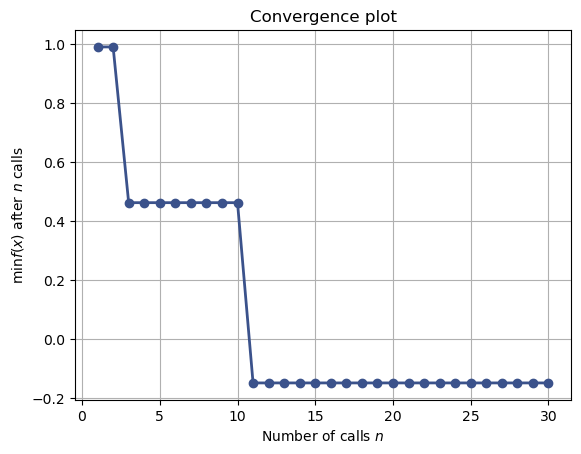

In [1]:
import numpy as np
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt.plots import plot_convergence, plot_objective

# 1. Define your parameter search space
# Let's say your simulator has 3 parameters:
# - 'learning_rate': a float between 0.001 and 0.1 (log scale)
# - 'num_layers': an integer between 1 and 5
# - 'regularization': a float between 0.01 and 1.0

space = [
    Real(1e-3, 1e-1, prior='log-uniform', name='learning_rate'),
    Integer(1, 5, name='num_layers'),
    Real(0.01, 1.0, name='regularization')
]

# 2. Define your expensive loss function
# This function runs your simulator, compares to experimental data, and returns a single loss value.
# We will create a dummy function here for demonstration.
@use_named_args(space)
def loss_function(**params):
    """
    This is your black-box function.
    It takes named parameters, runs the simulation, and returns the loss.
    """
    # In your real code, you would use the 'params' dict to configure and run your simulator
    print(f"Running simulator with: {params}")
    
    # --- YOUR SIMULATOR & COMPARISON CODE GOES HERE ---
    # For this example, let's just use a simple mathematical function
    lr = params['learning_rate']
    nl = params['num_layers']
    reg = params['regularization']
    
    # An arbitrary formula to simulate a complex loss surface
    loss = np.sin(5 * nl) + (1 - lr)**2 + reg**2
    
    print(f"-> Loss: {loss:.4f}\n")
    return loss

# 3. Run Bayesian Optimization
# n_calls is the total number of times you are willing to run your expensive simulator
print("Starting Bayesian Optimization...")
result = gp_minimize(
    func=loss_function,      # the function to minimize
    dimensions=space,        # the search space
    n_calls=30,              # total number of evaluations
    n_initial_points=10,     # number of random points to start with
    random_state=42
)

# 4. Check the results
print("Optimization finished.")
print(f"Best parameters found: ")
print(f" - learning_rate: {result.x[0]:.6f}")
print(f" - num_layers: {result.x[1]}")
print(f" - regularization: {result.x[2]:.4f}")
print(f"Best loss found: {result.fun:.4f}")

# You can also plot the convergence
plot_convergence(result)